### Problem Statement

Selama 1 tahun terakhir, sebuah coffee shop telah mencatat data transaksi penjualan. Namun, data tersebut belum diidentifikasi dan belum digunakan untuk mendukung pengambilan keputusan bisnis.


### Data Preparation

Url Dataset :https://www.kaggle.com/datasets/pzyeu32/daily-grind-coffee-sales




In [551]:
# Package
import pandas as pd
import matplotlib.pyplot as plt

In [552]:
# Load Dataset
df = pd.read_csv('P0M1_haafizhhamda_dataset.csv')
df.head()

,transaction_id,transaction_date,transaction_time,product_id,product_name,product_category,size,quantity,unit_price,total_price,payment_method,customer_id,loyalty_points_earned,location,barista_id
0,1,2025-03-13,10:10:19,P302,Croissant,Bakery,NaN,1,3.0,3.0,Debit Card,C624,6,Airport,EMP001
1,2,2024-09-26,13:13:41,P302,Croissant,Bakery,NaN,1,3.0,3.0,Credit Card,C549,6,University,EMP001
2,3,2025-03-23,16:17:20,P302,Croissant,Bakery,NaN,2,3.0,6.0,Cash,C857,0,Airport,EMP002
3,4,2025-05-28,16:31:54,P201,Green Tea,Tea,Small,2,2.0,4.0,Credit Card,C402,8,Downtown,EMP004
4,5,2025-01-16,19:17:24,P302,Croissant,Bakery,NaN,3,3.0,9.0,Credit Card,NaN,0,Mall Branch,EMP002


### Data Processing

In [565]:
df.columns

Index(['transaction_date', 'transaction_time', 'product_name',
       'product_category', 'quantity', 'unit_price', 'total_price',
       'payment_method', 'loyalty_points_earned', 'location', 'bulan'],
      dtype='object')

In [553]:
# Check Duplicated
df.duplicated().sum()

0

In [554]:
# Check Missing Value
df.isnull().sum()

transaction_id              0
transaction_date            0
transaction_time            0
product_id                  0
product_name                0
product_category            0
size                     1464
quantity                    0
unit_price                  0
total_price                 0
payment_method              0
customer_id              1537
loyalty_points_earned       0
location                    0
barista_id                  0
dtype: int64

In [555]:
# Drop Misiing Value
df.drop(columns=['size','customer_id','transaction_id','product_id','barista_id'],axis=1,inplace=True)
df.head()

,transaction_date,transaction_time,product_name,product_category,quantity,unit_price,total_price,payment_method,loyalty_points_earned,location
0,2025-03-13,10:10:19,Croissant,Bakery,1,3.0,3.0,Debit Card,6,Airport
1,2024-09-26,13:13:41,Croissant,Bakery,1,3.0,3.0,Credit Card,6,University
2,2025-03-23,16:17:20,Croissant,Bakery,2,3.0,6.0,Cash,0,Airport
3,2025-05-28,16:31:54,Green Tea,Tea,2,2.0,4.0,Credit Card,8,Downtown
4,2025-01-16,19:17:24,Croissant,Bakery,3,3.0,9.0,Credit Card,0,Mall Branch


In [556]:
# Change Dtype
df['transaction_date'] = pd.to_datetime(df['transaction_date'],yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_date       4998 non-null   datetime64[ns]
 1   transaction_time       4998 non-null   object        
 2   product_name           4998 non-null   object        
 3   product_category       4998 non-null   object        
 4   quantity               4998 non-null   int64         
 5   unit_price             4998 non-null   float64       
 6   total_price            4998 non-null   float64       
 7   payment_method         4998 non-null   object        
 8   loyalty_points_earned  4998 non-null   int64         
 9   location               4998 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 390.6+ KB


### Product

In [557]:
# Selection Product
product = df.groupby(['product_name', 'product_category']).agg(
    revenue    = ('total_price', 'sum'),
    total_quantity = ('quantity', 'count'),
    min_quantity = ('quantity', 'min'),
    max_quantity = ('quantity', 'max')
).reset_index()

product


,product_name,product_category,revenue,total_quantity,min_quantity,max_quantity
0,Blueberry Muffin,Bakery,3662.5,726,1,3
1,Cappuccino,Coffee,4465.0,656,1,3
2,Chai Latte,Tea,5131.5,690,1,3
3,Croissant,Bakery,4374.0,738,1,3
4,Espresso,Coffee,3929.5,728,1,3
5,Green Tea,Tea,3281.5,737,1,3
6,Latte,Coffee,5894.5,723,1,3


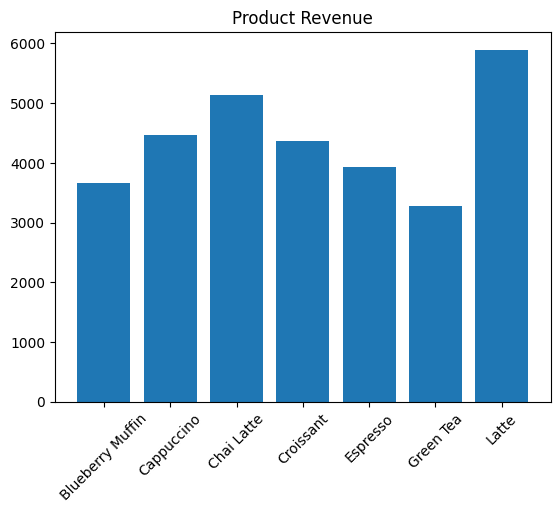

In [558]:
plt.bar(product['product_name'], product['revenue'])
plt.title("Product Revenue")
plt.xticks(rotation=45)
plt.show()


- Latte adalah produk paling menguntungkan → jadikan signature drink.
- Kategori Coffee adalah tulang punggung pendapatan.
- Produk Tea menghasilkan revenue rendah → butuh strategi penjualan baru.
- Pola pembelian menunjukkan pelanggan cenderung membeli sedikit item → gunakan strategi upselling ringan.
- Bakery sangat cocok untuk bundling dan peningkatan transaksi.

### Lacation

In [559]:
# Selection Loction
lokasi = df.groupby(['location']).agg(
    revenue    = ('total_price', 'sum'),
    total_quantity = ('quantity', 'count'),
    produk_terlaris = ('product_name', lambda x : x.mode()[0]) 
).reset_index()

lokasi


,location,revenue,total_quantity,produk_terlaris
0,Airport,7281.0,1194,Croissant
1,Downtown,7731.0,1267,Green Tea
2,Mall Branch,8070.0,1290,Chai Latte
3,University,7656.5,1247,Blueberry Muffin


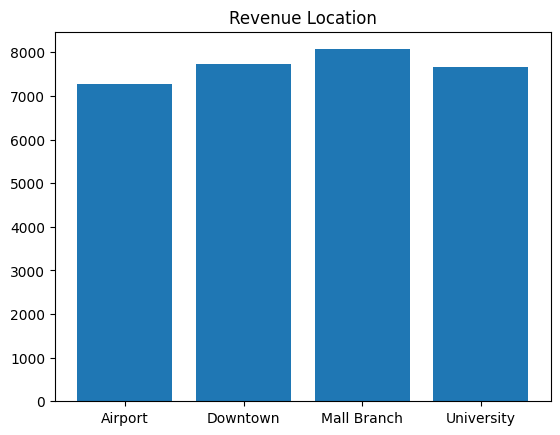

In [560]:
plt.bar(lokasi['location'], lokasi['revenue'])
plt.title("Revenue Location")
plt.show()


- Mall Branch adalah penyumbang revenue utama, cocok untuk strategi premium.
- Airport menjadi lokasi dengan peluang pertumbuhan terbesar.
- Preferensi produk berbeda di tiap lokasi → harus dilakukan segmentasi menu.
- Downtown dan University stabil, cocok untuk strategi volume dan loyalty.

### Trend Revenue

In [561]:
# New Colom bulan
df['bulan'] = df['transaction_date'].dt.to_period('M').astype(str)
# Selection waktu
waktu = df.groupby(['bulan']).agg(
    revenue = ('total_price','sum')
).reset_index()
waktu

,bulan,revenue
0,2024-08,1755.5
1,2024-09,2738.5
2,2024-10,2638.0
3,2024-11,2682.0
4,2024-12,2367.5
5,2025-01,2608.5
6,2025-02,2288.5
7,2025-03,2685.0
8,2025-04,2607.0
9,2025-05,2509.5


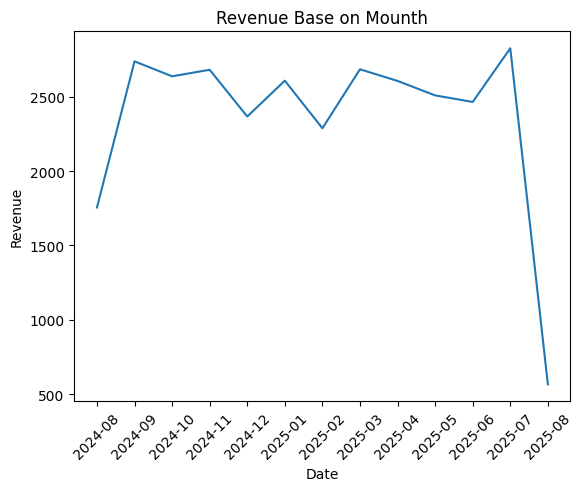

In [562]:
plt.plot(waktu['bulan'], waktu['revenue'])
plt.title("Revenue Base on Mounth")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

- Revenue tertinggi: Juli 2025
- Revenue terendah: Agustus 2025 (potensi data incomplete)
- Pola revenue: fluktuatif tapi stabil di awal 2025
- Potensi besar: Q3–Q4 dan Juli
- Butuh atensi khusus: Agustus

### Payment Method

In [563]:
payment = df.groupby(['payment_method']).agg(
    revenue = ('total_price','sum'),
    total_transksi =('total_price','count') 
).reset_index()
payment

,payment_method,revenue,total_transksi
0,Cash,10160.5,1651
1,Credit Card,10414.5,1695
2,Debit Card,10163.5,1652


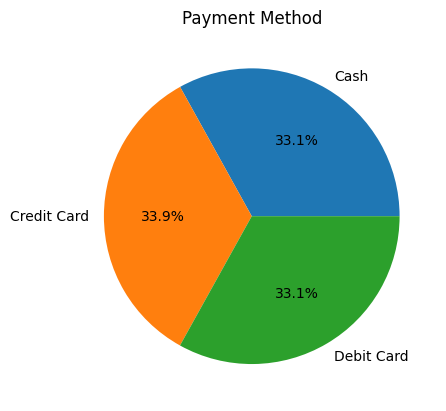

In [564]:
labels = payment.payment_method.unique()
sizes = payment.revenue

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Payment Method")
plt.show()


- Metode pembayaran paling kuat: Credit Card (revenue & transaksi tertinggi).
- Cash & Debit Card memiliki performa setara, menandakan pelanggan tetap nyaman bertransaksi secara tradisional.
- Bisnis dapat fokus pada promo kartu kredit, adopsi e-wallet, serta optimasi pembayaran tunai untuk meningkatkan revenue.

### Kesimpulan
Berdasarkan hasil analisis dari berbagai sudut pandang—produk, lokasi, periode waktu, dan metode pembayaran—terlihat bahwa performa penjualan coffee shop cukup stabil, namun masih memiliki ruang besar untuk optimasi.

1. Kinerja Produk: Latte dan Chai Latte adalah pendorong revenue utama

    Latte menghasilkan revenue tertinggi, diikuti Chai Latte, sementara Bakery seperti Croissant dan Blueberry Muffin juga berkontribusi kuat dalam total penjualan. Ini menunjukkan bahwa menu minuman tetap menjadi core business, namun produk bakery berhasil menjadi complementary item yang efektif.

2. Kinerja Lokasi: Mall Branch memiliki performa terbaik

    Mall Branch mencatat revenue dan jumlah pesanan tertinggi, menunjukkan bahwa lokasi dengan traffic tinggi menjadi titik penjualan paling efektif. Sementara itu, lokasi lain seperti Downtown dan University tetap memberikan kontribusi kuat, tapi masih di bawah Mall Branch.

    Setiap lokasi juga memiliki produk favorit yang berbeda, menunjukkan bahwa preferensi pelanggan sangat dipengaruhi oleh konteks lokasi.

3. Tren Bulanan: Penjualan paling kuat terjadi di September–Oktober dan Juli tahun berikutnya

    - Revenue bulanan menunjukkan pola yang fluktuatif, tetapi:
    - Puncak pertama: September 2024
    - Puncak kedua: Juli 2025

    Ini menunjukkan adanya seasonality yang bisa dimanfaatkan dengan strategi promo musiman. Penurunan besar di Agustus 2025 mengindikasikan adanya potensi gangguan operasional atau faktor musiman yang perlu dievaluasi.

4. Pola Pembayaran: Pengguna Credit Card adalah penyumbang utama revenue

    Metode pembayaran paling sering digunakan adalah Credit Card, baik dari sisi revenue maupun jumlah transaksi. Cash dan Debit Card memiliki performa hampir identik. Hal ini menegaskan bahwa pelanggan semakin nyaman dengan pembayaran non-tunai sehingga coffee shop perlu memperkuat infrastruktur digital payment.
    
Secara keseluruhan, coffee shop memiliki performa yang solid dengan kontribusi terbesar dari menu minuman, lokasi Mall Branch, musim penjualan tertentu (peak period), dan metode pembayaran non-tunai. Dengan mengoptimalkan strategi menu, lokasi, promosi musiman, dan integrasi pembayaran digital, coffee shop dapat meningkatkan penjualan secara signifikan dan mempertahankan pertumbuhan jangka panjang.